## Dataset
I choose a VICI.cvs stock and will hope that noone else pick it <3

In [1]:
import pandas as pd
import numpy as np

file_path = "C:/Users/sindr/Desktop/VICI.csv"
data = pd.read_csv(file_path)

data.dropna()
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-18,18.500000,18.520000,18.50,18.500000,16.393757,8227502
1,2017-10-19,18.500000,18.570000,18.50,18.500000,16.393757,550484
2,2017-10-20,18.250000,19.000000,18.00,18.000000,15.950686,155577
3,2017-10-23,18.000000,18.000000,18.00,18.000000,15.950686,349
4,2017-10-24,18.700001,18.700001,18.65,18.650000,16.526680,287571
...,...,...,...,...,...,...,...
612,2020-03-26,15.810000,16.650000,15.51,16.150000,15.851260,6193700
613,2020-03-27,15.360000,16.549999,15.13,16.110001,15.812000,6137500
614,2020-03-30,15.700000,16.200001,14.38,16.040001,16.040001,5639800
615,2020-03-31,16.070000,16.950001,15.70,16.639999,16.639999,8263300


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       617 non-null    object 
 1   Open       617 non-null    float64
 2   High       617 non-null    float64
 3   Low        617 non-null    float64
 4   Close      617 non-null    float64
 5   Adj Close  617 non-null    float64
 6   Volume     617 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 33.9+ KB


## Date column preprocessing

In [3]:
data['Date'] = pd.to_datetime(data['Date'])

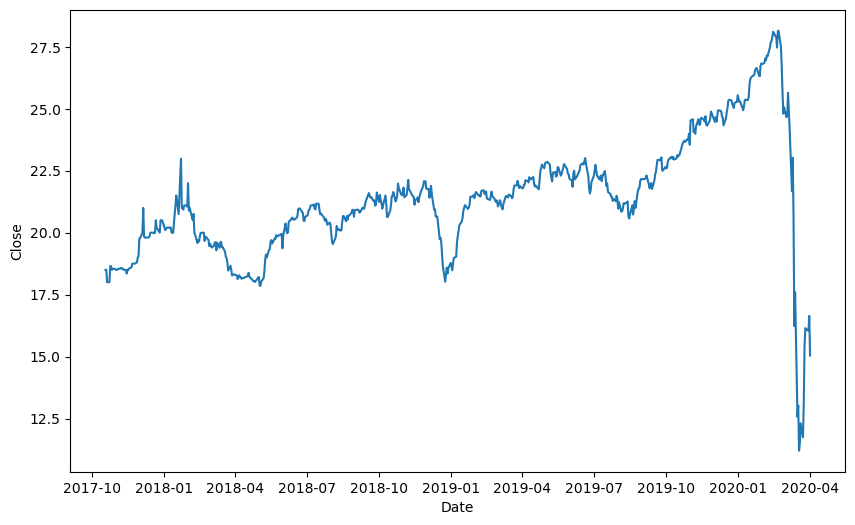

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'])
plt.xlabel('Date')
plt.ylabel('Close')

plt.show()

## Preprocessing

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encoding data with LabelEncoder
label_encoder = LabelEncoder()
objects = data.select_dtypes(include='object').columns
data[objects] = data[objects].astype('category')
categories = data.select_dtypes(include='category').columns

for x in categories:
    data[x] = label_encoder.fit_transform(data[x])

# Splittig data
X, y = data.drop('Close', axis=1), data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train['Date'] = X_train['Date'].astype('int64') 
X_test['Date'] = X_test['Date'].astype('int64')

In [6]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (493, 6)
X_test shape: (124, 6)
y_train shape: (493,)
y_test shape: (124,)


In [10]:
X_train

,Date,Open,High,Low,Adj Close,Volume
0,1508284800000000000,18.500000,18.520000,18.500000,16.393757,8227502
1,1508371200000000000,18.500000,18.570000,18.500000,16.393757,550484
2,1508457600000000000,18.250000,19.000000,18.000000,15.950686,155577
3,1508716800000000000,18.000000,18.000000,18.000000,15.950686,349
4,1508803200000000000,18.700001,18.700001,18.650000,16.526680,287571
...,...,...,...,...,...,...
488,1569542400000000000,22.559999,22.629999,22.332001,21.832788,3338100
489,1569801600000000000,22.520000,22.730000,22.469999,21.968575,3291500
490,1569888000000000000,22.629999,22.760000,22.495001,21.910381,1883900
491,1569974400000000000,22.570000,22.660000,22.459999,21.929779,3571700


In [11]:
X_test

,Date,Open,High,Low,Adj Close,Volume
493,1570147200000000000,22.850000,22.959999,22.725000,22.259552,2730900
494,1570406400000000000,22.950001,23.070000,22.740000,22.346844,7656900
495,1570492800000000000,22.990000,23.059999,22.740000,22.366240,6248700
496,1570579200000000000,23.120001,23.170000,22.934999,22.288647,2531500
497,1570665600000000000,22.959999,23.070000,22.865000,22.366240,3047500
...,...,...,...,...,...,...
612,1585180800000000000,15.810000,16.650000,15.510000,15.851260,6193700
613,1585267200000000000,15.360000,16.549999,15.130000,15.812000,6137500
614,1585526400000000000,15.700000,16.200001,14.380000,16.040001,5639800
615,1585612800000000000,16.070000,16.950001,15.700000,16.639999,8263300


In [12]:
y_train

0      18.500000
1      18.500000
2      18.000000
3      18.000000
4      18.650000
         ...    
488    22.510000
489    22.650000
490    22.590000
491    22.610001
492    22.850000
Name: Close, Length: 493, dtype: float64

In [13]:
y_test

493    22.950001
494    23.040001
495    23.059999
496    22.980000
497    23.059999
         ...    
612    16.150000
613    16.110001
614    16.040001
615    16.639999
616    15.040000
Name: Close, Length: 124, dtype: float64

## Linear Regression


In [14]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score

tscv = TimeSeriesSplit(n_splits=5)
mse_scores = []
mae_scores = []
r2_scores = []
accuracy_scores = []

for train_index, val_index in tscv.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    X_train_fold.reset_index(drop=True, inplace=True)
    y_train_fold.reset_index(drop=True, inplace=True)

    model = LinearRegression()
    model.fit(X_train_fold, y_train_fold)
    y_pred = model.predict(X_val_fold)
    
    mse = mean_squared_error(y_val_fold, y_pred)
    mae = mean_absolute_error(y_val_fold, y_pred)
    r2 = r2_score(y_val_fold, y_pred)
    threshold = 0.1  
    accuracy = accuracy_score((abs(y_pred - y_val_fold) < threshold).astype(int), np.ones_like(y_pred))
    
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    accuracy_scores.append(accuracy)
    
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [16]:
print("Mean MSE:", np.mean(mse_scores))
print("Mean MAE:", np.mean(mae_scores))
print("Mean R2 Score:", np.mean(r2_scores))
print("Mean Accuracy:", np.mean(accuracy_scores))

Mean MSE: 0.4944220151299115
Mean MAE: 0.4506584867075681
Mean R2 Score: 0.06087169477858212
Mean Accuracy: 0.3170731707317073


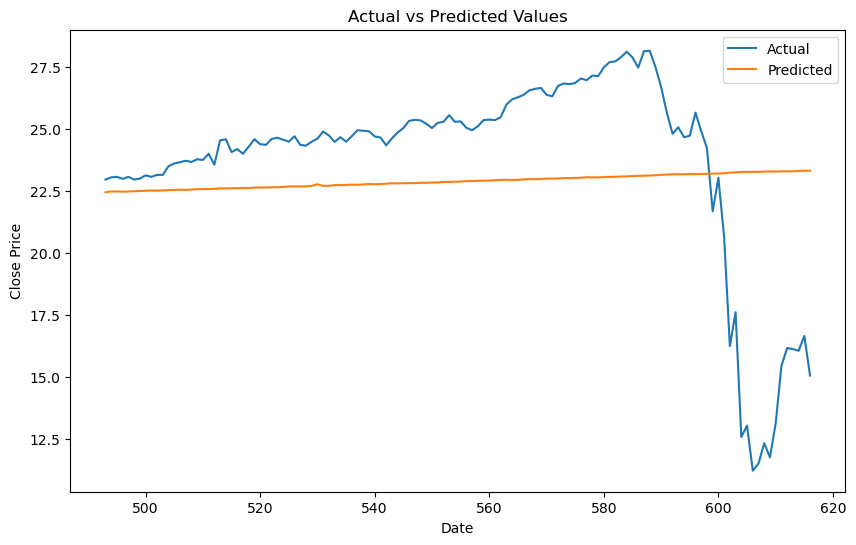

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, predictions, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

## Random Forest

In [18]:
from sklearn.ensemble import RandomForestRegressor

mse_scores = []
mae_scores = []
r2_scores = []
accuracy_scores = []

for train_index, val_index in tscv.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    X_train_fold.reset_index(drop=True, inplace=True)
    y_train_fold.reset_index(drop=True, inplace=True)

    model = RandomForestRegressor()
    model.fit(X_train_fold, y_train_fold)
    y_pred = model.predict(X_val_fold)
    
    mse = mean_squared_error(y_val_fold, y_pred)
    mae = mean_absolute_error(y_val_fold, y_pred)
    r2 = r2_score(y_val_fold, y_pred)
    threshold = 0.1  
    accuracy = accuracy_score((abs(y_pred - y_val_fold) < threshold).astype(int), np.ones_like(y_pred))
    
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    accuracy_scores.append(accuracy)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [19]:
print("Mean MSE:", np.mean(mse_scores))
print("Mean MAE:", np.mean(mae_scores))
print("Mean R2 Score:", np.mean(r2_scores))
print("Mean Accuracy:", np.mean(accuracy_scores))

Mean MSE: 0.0831880652747864
Mean MAE: 0.22832403894750092
Mean R2 Score: 0.7873432337067781
Mean Accuracy: 0.29024390243902437


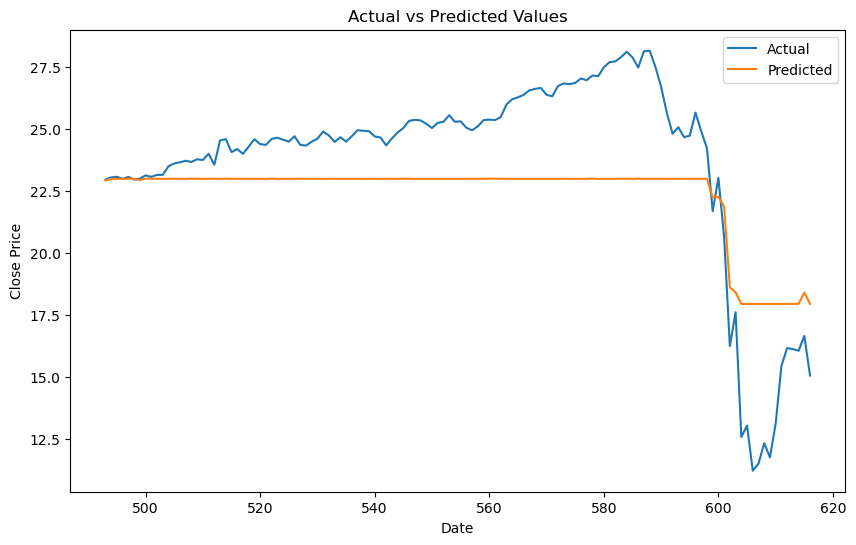

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, predictions, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Можемо замітити, що предикції Random Forest є трішки кращі ніж Linear Regression

## LSTM-DNN

In [25]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Scaling + Reshaping
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=True))
model.add(LSTM(units=256))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train_reshaped, y_train, epochs=500, batch_size=32, verbose=1, validation_data=(X_test_reshaped, y_test))
predictions = model.predict(X_test_reshaped)

Epoch 1/500


C:\Users\sindr\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 429.7788 - val_loss: 546.3586
Epoch 2/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 410.5056 - val_loss: 461.2369
Epoch 3/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 363.2899 - val_loss: 257.9662
Epoch 4/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 248.5170 - val_loss: 54.7409
Epoch 5/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 100.9501 - val_loss: 30.2814
Epoch 6/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 34.2002 - val_loss: 60.4843
Epoch 7/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 26.4701 - val_loss: 50.5676
Epoch 8/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.3704 - val_loss: 37.6509
Epoch 9/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20.8534 - val_loss: 33.5479
Epoch 10/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.1765 - val_loss: 31.7475
Epoch 11/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.1929 - val_loss: 29.0195
Epoch 12/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 64)               │          18,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 256)                 │         328,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,041,413 (3.97 MB)

 Trainable params: 347,137 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 694,276 (2.65 MB)

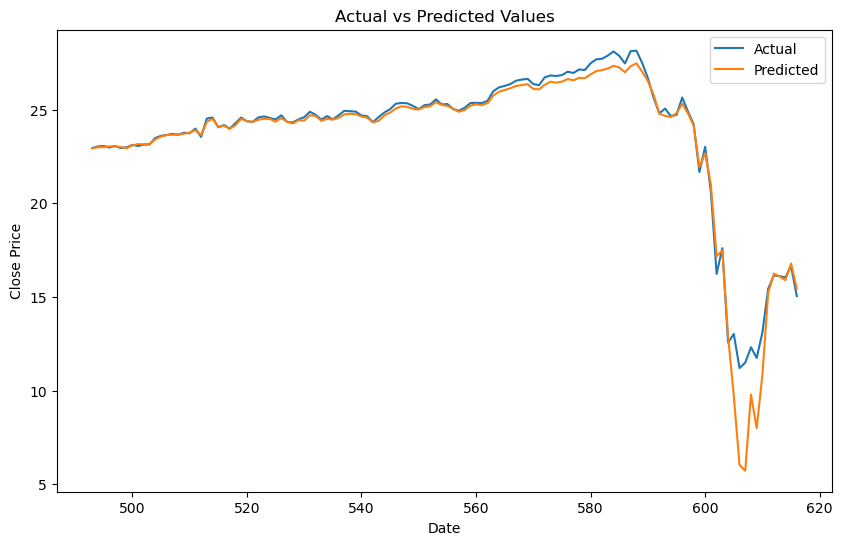

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, predictions, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Бачимо, що LSTM-DNN видає дуже точні результати

In [35]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten

X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=256))
model.add(Flatten())
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.fit(X_train_reshaped, y_train, epochs=500, batch_size=32, verbose=1, validation_data=(X_test_reshaped, y_test))
predictions = model.predict(X_test_reshaped)

Epoch 1/500


C:\Users\sindr\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 427.5301 - val_loss: 487.7844
Epoch 2/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 345.5825 - val_loss: 57.2181
Epoch 3/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 53.6188 - val_loss: 12.9103
Epoch 4/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14.3440 - val_loss: 3.4095
Epoch 5/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3431 - val_loss: 4.3244
Epoch 6/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.7197 - val_loss: 4.5528
Epoch 7/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7044 - val_loss: 5.7765
Epoch 8/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5403 - val_loss: 7.2000
Epoch 9/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3237 - val_loss: 8.1530
Epoch 10/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2628 - val_loss: 8.9048
Epoch 11/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2246 - val_loss: 9.4685
Epoch 12/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.21

In [32]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 4, 64)               │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 2, 64)               │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 256)                 │         328,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,086,725 (4.15 MB)

 Trainable params: 362,241 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 724,484 (2.76 MB)

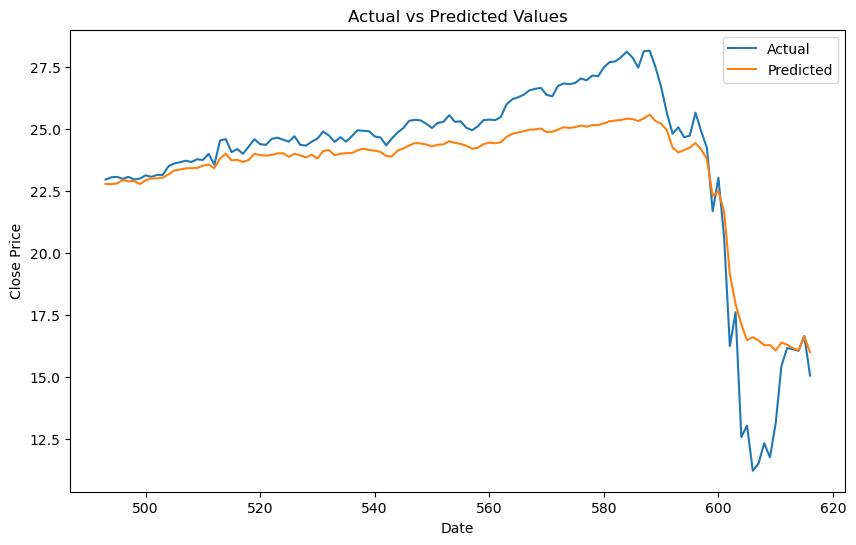

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, predictions, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()